In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTING THE DATASET
bal_df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',sep=',',header=None,names=['Class','Left-Weight','Left-Distance','Right-Weight','Right-Distance'])

In [3]:
bal_df.shape

(625, 5)

In [4]:
bal_df.head()

,Class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
# SUMMARY OF THE DATA
bal_df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [6]:
bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class             625 non-null object
Left-Weight       625 non-null int64
Left-Distance     625 non-null int64
Right-Weight      625 non-null int64
Right-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


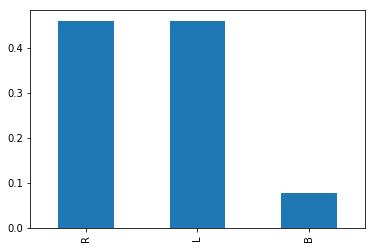

In [7]:
# CHECKING THE VALUE_COUNT OF THE TARGET VARIABLE "Class"
bal_df['Class'].value_counts(normalize=True).plot.bar()

In [8]:
# VISUALIZATION OF THE RELATION BETWEEN THE TARGET VARIABLE AND DIFFERENT FEATURES OF THE DATA

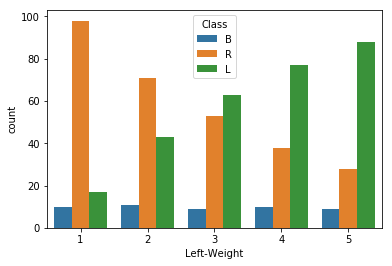

In [9]:
f,ax = plt.subplots()
sns.countplot(x='Left-Weight',hue='Class',data=bal_df)

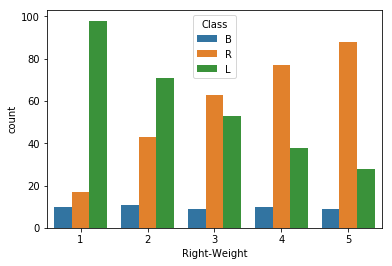

In [10]:
f,ax = plt.subplots()
sns.countplot(x='Right-Weight',hue='Class',data=bal_df)

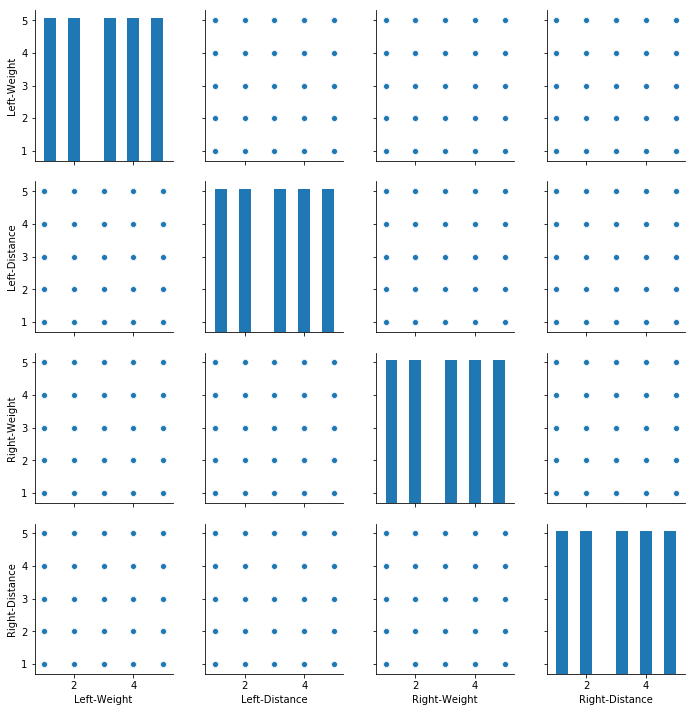

In [11]:
# PAIRPLOT
sns.pairplot(bal_df)

In [12]:
# FROM THE PAIRPLOT IT IS CLEAR THAT DATA IS UNIFORMLY DISTRIBUTED

In [13]:
# FINDING THE CORRELATION BETWEEN THE INDEPENDENT VARIABLES
bal_df.corr()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
Left-Weight,1.0,0.0,0.0,0.0
Left-Distance,0.0,1.0,0.0,0.0
Right-Weight,0.0,0.0,1.0,0.0
Right-Distance,0.0,0.0,0.0,1.0


In [14]:
bal = bal_df.drop('Class',axis=1)

In [15]:
corr_matrix = bal.corr().abs()

In [16]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape).astype(np.bool)))

In [17]:
upper

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
Left-Weight,1.0,0.0,0.0,0.0
Left-Distance,NaN,1.0,0.0,0.0
Right-Weight,NaN,NaN,1.0,0.0
Right-Distance,NaN,NaN,NaN,1.0


In [18]:
# THRESHOLD = 0.8
drop = [column for column in upper.columns if any(upper[column]>0.8)]

In [19]:
drop

['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']

In [20]:
# WE CAN SEE ALL THE FEATURES ARE CORRELATED TO EACH OTHER
# HENCE CANNOT DROP ANY OF THEM

In [21]:
corr_map = bal_df.corr()

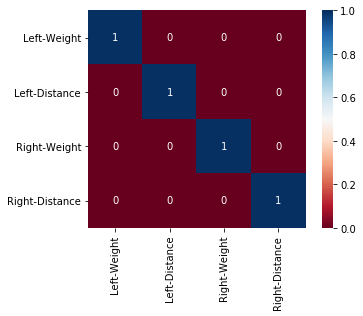

In [44]:
# PLOTTING THE CORREALTION HEATMAP
sns.heatmap(corr_map,annot=True,square=True,cmap='RdBu')

In [23]:
# DIVIDING THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLES
x = bal_df.drop('Class',axis=1)
y = bal_df['Class']

In [24]:
# CONVERTING THE CATEGORICAL DATA OF INDEPENDENT VARIABLE INTO NUMERICAL THROUGH LABEL ENCODER
# IMPORTING THE LIBRARY
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
y=le.fit_transform(y)

In [26]:
# IMPORTING THE TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [27]:
# APPLYING 
# Random Forest Classifier
# Decision Tree Classifier
# Support Vector Machine
# K-Nearest Neighbor

In [28]:
# IMPORTING THE LIBRAIES
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# CLASSIFICATION METRICS
from sklearn.metrics import accuracy_score as score ,confusion_matrix

In [30]:
#Random Forest
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  79.2


In [31]:
matrix = confusion_matrix(pred, y_test)
matrix

array([[ 0,  9,  5],
       [ 3, 42,  2],
       [ 4,  3, 57]], dtype=int64)

In [32]:
# TARGET VARIABLE CONTAINS THREE VARIABLES THUS WE HAVE 3*3 CONFUSION MATRIX

In [33]:
# RANDOM FOREST MODEL PREDICTED 79.2% ACCURACY WHICH IS GOOD

In [34]:
#DT
clf = DecisionTreeClassifier( max_depth=3, min_samples_leaf=2)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  70.39999999999999


In [35]:
#SVM
clf = SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  90.4


In [36]:
# SVM MODEL HAS PREDICTED 90.4% CORRECT WHICH IS BETTER THAN RANDOM FOREST AND DECISION TREE

In [37]:
#KNN
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)


Accuracy in percent =  87.2


In [38]:
# KNN MODEL HAS PREDICTED THE ACCURACY WITH 87.2 % WHICH IS GOOD

In [45]:
# SAVING THE MODEL THE SVM MODEL 
# IMPORTING PICKLE
import pickle

In [46]:
filehandler = open("finalmodel_1.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(clf,filehandler)
filehandler.close()